##**Desafío TelecomX - Análisis de Evasión de Clientes**##

###**Extracción de Datos**###

In [1]:
import pandas as pd
import requests
import json
import numpy as np

In [2]:
df = requests.get("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

resultado = json.loads(df.text)

df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###**Transformación**###

In [3]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [4]:
cutomer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#Creando dataframe base

telecom_df = pd.concat([id_churn, cutomer, phone, internet, account, id_churn], axis=1)
telecom_df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0002-ORFBO,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0003-MKNFE,No
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ,Yes
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,0013-EXCHZ,Yes


In [5]:
telecom_df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
969,1360-JYXKQ,No,Female,1,Yes,No,54,Yes,No,Fiber optic,...,Yes,Yes,Yes,One year,Yes,Electronic check,99.10,5437.1,1360-JYXKQ,No
1701,2408-WITXK,Yes,Female,1,No,No,10,No,No phone service,DSL,...,No,No,Yes,Month-to-month,Yes,Electronic check,34.70,329.8,2408-WITXK,Yes
6704,9229-RQABD,No,Male,0,No,No,18,Yes,Yes,No,...,No internet service,No internet service,No internet service,One year,No,Mailed check,23.75,424.5,9229-RQABD,No
6776,9351-LZYGF,No,Female,0,Yes,No,42,Yes,Yes,DSL,...,Yes,No,No,Month-to-month,Yes,Credit card (automatic),66.40,2727.8,9351-LZYGF,No
6466,8884-ADFVN,Yes,Male,1,Yes,No,7,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.95,700.85,8884-ADFVN,Yes


In [6]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
#Datos Nulos
telecom_df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
#Valores duplicados
print(telecom_df.duplicated().sum())

0


In [9]:
# Deja solo la primera aparición de cada columna
telecom_df = telecom_df.loc[:, ~telecom_df.columns.duplicated()]


In [10]:
#Verificación de valores únicos
for col in ["customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
            "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
            "PaperlessBilling", "PaymentMethod", "Charges.Monthly", "Charges.Total"]:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-"*20)

Valores únicos para la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'Churn':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'gender':
['Female' 'Male']
--------------------
Valores únicos para la columna 'SeniorCitizen':
[0 1]
--------------------
Valores únicos para la columna 'Partner':
['Yes' 'No']
--------------------
Valores únicos para la columna 'Dependents':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'PhoneService':
['Yes' 'No']
--------------------
Valores únicos para la columna 'MultipleLines':
['No' 'Yes' 'No phone service']
---------------

####**Limpieza de datos en texto**####

In [16]:
# Conversión de columnas númericas mal tipadas

telecom_df['Charges.Total'] = pd.to_numeric(telecom_df['Charges.Total'], errors='coerce')


In [17]:
# Conversión de columnas categóricas

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    telecom_df[col] = telecom_df[col].astype('category')


In [18]:
print(telecom_df.dtypes)
print(telecom_df.head())


customerID            object
Churn               category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges.Monthly      float64
Charges.Total        float64
dtype: object
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCH

In [19]:
print(telecom_df.isna().sum())


customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [24]:
# Columnas Cuentas Diarias

telecom_df['Cuentas_Diarias'] = telecom_df['Charges.Monthly'] / 30

telecom_df[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head(10)


,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.60,2.186667
1,0003-MKNFE,59.90,1.996667
2,0004-TLHLJ,73.90,2.463333
3,0011-IGKFF,98.00,3.266667
4,0013-EXCHZ,83.90,2.796667
5,0013-MHZWF,69.40,2.313333
6,0013-SMEOE,109.70,3.656667
7,0014-BMAQU,84.65,2.821667
8,0015-UOCOJ,48.20,1.606667
9,0016-QLJIS,90.45,3.015000


In [25]:
# Para todas las columnas donde solo hay 'Yes' y 'No'
yes_no_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in yes_no_cols:
    telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0})


In [27]:
telecom_df = telecom_df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Telefono',
    'MultipleLines': 'Lineas_Adicionales',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'TV_Stream',
    'StreamingMovies': 'Peliculas_Stream',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cuentas_Diarias'
})

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID_Cliente              7267 non-null   object  
 1   Evasion                 7043 non-null   float64 
 2   Genero                  7267 non-null   category
 3   Adulto_Mayor            7267 non-null   int64   
 4   Pareja                  7267 non-null   category
 5   Dependientes            7267 non-null   category
 6   Meses_Contrato          7267 non-null   int64   
 7   Telefono                7267 non-null   category
 8   Lineas_Adicionales      7267 non-null   category
 9   Tipo_Internet           7267 non-null   category
 10  Seguridad_Online        7267 non-null   category
 11  Respaldo_Online         7267 non-null   category
 12  Proteccion_Dispositivo  7267 non-null   category
 13  Soporte_Tecnico         7267 non-null   category
 14  TV_Stream               

###**Carga y Analisis**###

####**Análisis Descriptivo**####

In [29]:
telecom_df.describe()

,Evasion,Adulto_Mayor,Meses_Contrato,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.441561,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


####**Distribución de Evasión**####

In [31]:
# Calcular valores absolutos
conteos = telecom_df['Evasion'].value_counts()  # Si tu columna se llama 'Evasion'
print("Conteo de evasión:")
print(conteos)

# Calcular proporciones (porcentaje)
proporciones = telecom_df['Evasion'].value_counts(normalize=True) * 100
print("\nProporción de evasión (%):")
print(proporciones.round(2))


Conteo de evasión:
Evasion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de evasión (%):
Evasion
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


/tmp/ipython-input-35-2840906637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=telecom_df, x='Evasion', palette=['green', 'red'])


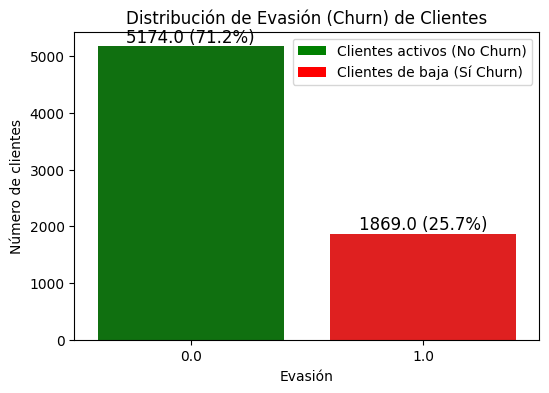

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
ax = sns.countplot(data=telecom_df, x='Evasion', palette=['green', 'red'])

# Etiquetas sobre las barras (número y porcentaje)
total = len(telecom_df)
for p in ax.patches:
    height = p.get_height()
    porcentaje = height / total * 100
    ax.annotate(f'{height} ({porcentaje:.1f}%)',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=12)

plt.title("Distribución de Evasión (Churn) de Clientes")
plt.xlabel("Evasión")
plt.ylabel("Número de clientes")

# Leyenda para los colores
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Clientes activos (No Churn)'),
                   Patch(facecolor='red', label='Clientes de baja (Sí Churn)')]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()



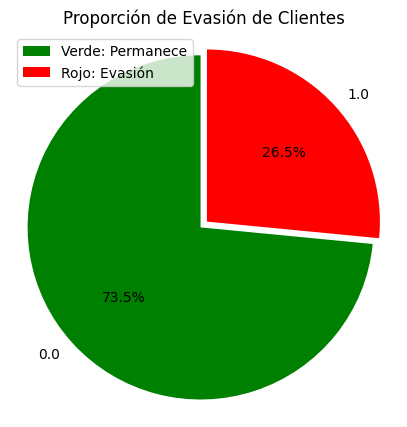

In [36]:
labels = proporciones.index
sizes = proporciones.values
colors = ['green', 'red']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=[0,0.05])
plt.title("Proporción de Evasión de Clientes")

# Leyenda con explicación de los colores
plt.legend(['Verde: Permanece', 'Rojo: Evasión'], loc='upper left')
plt.axis('equal')
plt.show()


####**Evasión por variable**####

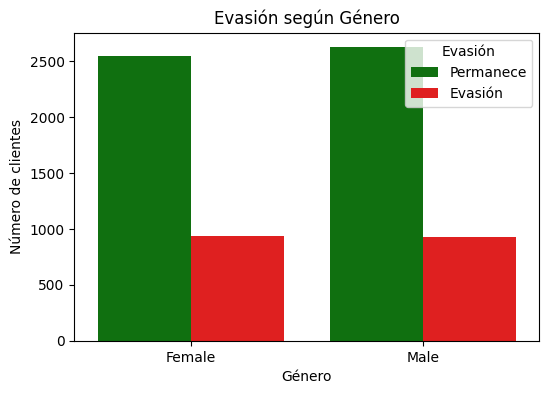

In [42]:
#Por genero
plt.figure(figsize=(6,4))
sns.countplot(data=telecom_df, x='Genero', hue='Evasion', palette=['green', 'red'])
plt.title("Evasión según Género")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.legend(title="Evasión", labels=['Permanece', 'Evasión'])
plt.show()


In [43]:
print(pd.crosstab(telecom_df['Genero'], telecom_df['Evasion'], normalize='index')*100)


Evasion        0.0        1.0
Genero                       
Female   73.079128  26.920872
Male     73.839662  26.160338


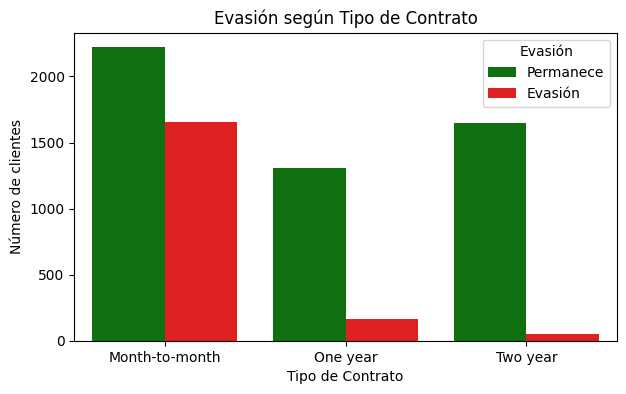

In [44]:
#Por tipo de contrato
plt.figure(figsize=(7,4))
sns.countplot(data=telecom_df, x='Tipo_Contrato', hue='Evasion', palette=['green', 'red'])
plt.title("Evasión según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de clientes")
plt.legend(title="Evasión", labels=['Permanece', 'Evasión'])
plt.show()


In [45]:
print(pd.crosstab(telecom_df['Tipo_Contrato'], telecom_df['Evasion'], normalize='index')*100)


Evasion               0.0        1.0
Tipo_Contrato                       
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


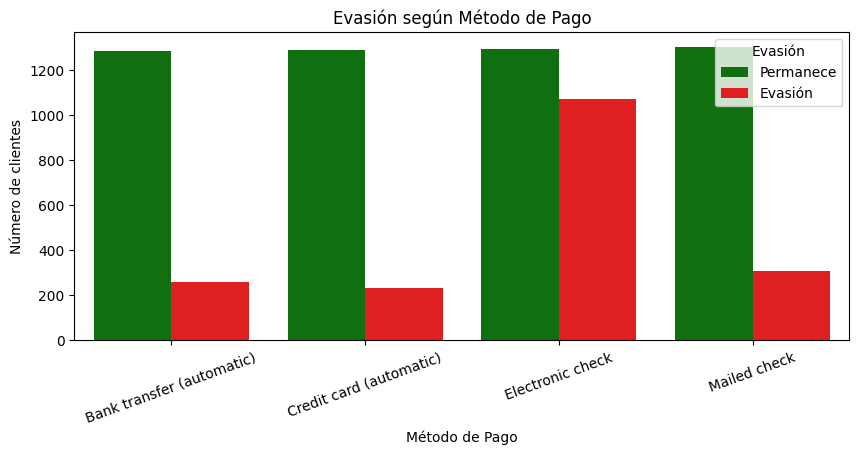

In [46]:
#Por método de pago
plt.figure(figsize=(10,4))
sns.countplot(data=telecom_df, x='Metodo_Pago', hue='Evasion', palette=['green', 'red'])
plt.title("Evasión según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Número de clientes")
plt.legend(title="Evasión", labels=['Permanece', 'Evasión'])
plt.xticks(rotation=20)
plt.show()


In [47]:
print(pd.crosstab(telecom_df['Metodo_Pago'], telecom_df['Evasion'], normalize='index')*100)


Evasion                          0.0        1.0
Metodo_Pago                                    
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


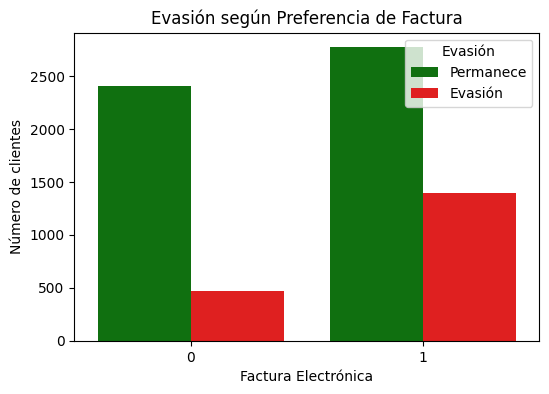

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=telecom_df, x='Factura_Electronica', hue='Evasion', palette=['green', 'red'])
plt.title("Evasión según Preferencia de Factura")
plt.xlabel("Factura Electrónica")
plt.ylabel("Número de clientes")
plt.legend(title="Evasión", labels=['Permanece', 'Evasión'])
plt.show()


In [49]:
print(pd.crosstab(telecom_df['Factura_Electronica'], telecom_df['Evasion'], normalize='index')*100)


Evasion                    0.0        1.0
Factura_Electronica                      
0                    83.669916  16.330084
1                    66.434908  33.565092


####**Conteo de evasión por variables numéricas**####

/tmp/ipython-input-50-649059980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Cargos_Totales', data=telecom_df, palette=["green", "red"])


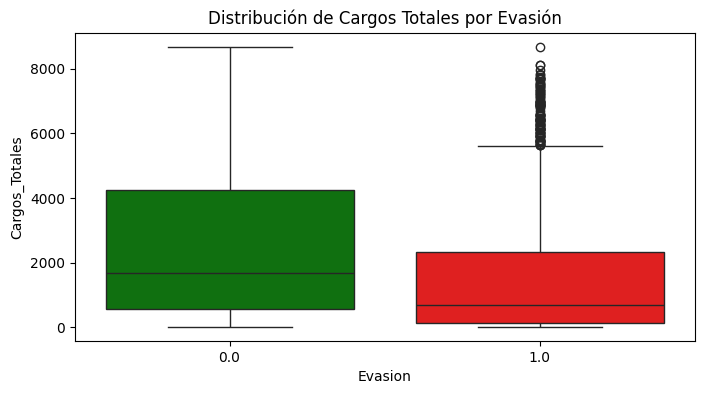

/tmp/ipython-input-50-649059980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Meses_Contrato', data=telecom_df, palette=["green", "red"])


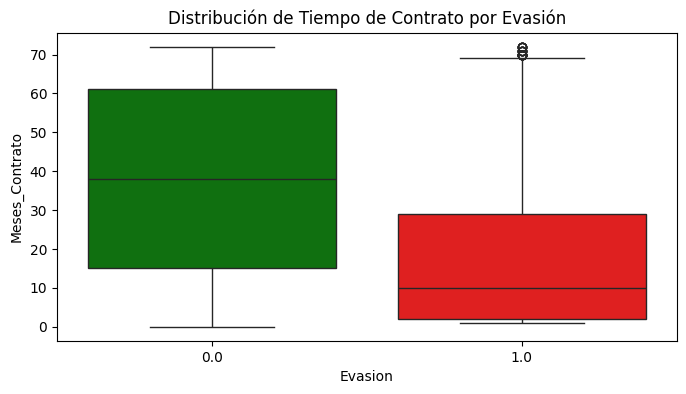

         Cargos_Totales  Meses_Contrato
Evasion                                
0.0             1683.60            38.0
1.0              703.55            10.0
         Cargos_Totales  Meses_Contrato
Evasion                                
0.0         2555.344141       37.569965
1.0         1531.796094       17.979133


In [50]:
# Boxplot de Cargos Totales según evasión
plt.figure(figsize=(8,4))
sns.boxplot(x='Evasion', y='Cargos_Totales', data=telecom_df, palette=["green", "red"])
plt.title('Distribución de Cargos Totales por Evasión')
plt.show()

# Boxplot de Tenure según evasión
plt.figure(figsize=(8,4))
sns.boxplot(x='Evasion', y='Meses_Contrato', data=telecom_df, palette=["green", "red"])
plt.title('Distribución de Tiempo de Contrato por Evasión')
plt.show()

# Estadísticos comparativos
print(telecom_df.groupby('Evasion')[['Cargos_Totales','Meses_Contrato']].median())
print(telecom_df.groupby('Evasion')[['Cargos_Totales','Meses_Contrato']].mean())


###**Análisis de correlación entre variables**###

In [52]:
# Lista de columnas de servicios: ajusta a tus nombres si cambiaste a español
servicios = [
    'Telefono', 'Lineas_Adicionales', 'Tipo_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'TV_Stream', 'Peliculas_Stream'
]

# Convierte "Yes"/"No" o sus equivalentes a 1/0 solo para el cálculo si aún no lo hiciste:
for col in servicios:
    if telecom_df[col].dtype.name == 'category' or telecom_df[col].dtype == object:
        telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0,
                                               'Si': 1, 'No': 0, 'yes': 1, 'no': 0})
    # Si ya es numérico, no hará nada

# Ahora suma los servicios activos por fila
telecom_df['Cantidad_Servicios'] = telecom_df[servicios].sum(axis=1)

corr_matrix = telecom_df[['Cuentas_Diarias', 'Cantidad_Servicios', 'Meses_Contrato', 'Cargos_Totales', 'Evasion_bin']].corr()
print(corr_matrix)



                    Cuentas_Diarias  Cantidad_Servicios  Meses_Contrato  \
Cuentas_Diarias            1.000000            0.773302        0.247982   
Cantidad_Servicios         0.773302            1.000000        0.526499   
Meses_Contrato             0.247982            0.526499        1.000000   
Cargos_Totales             0.652109            0.788053        0.825118   
Evasion_bin                     NaN                 NaN             NaN   

                    Cargos_Totales  Evasion_bin  
Cuentas_Diarias           0.652109          NaN  
Cantidad_Servicios        0.788053          NaN  
Meses_Contrato            0.825118          NaN  
Cargos_Totales            1.000000          NaN  
Evasion_bin                    NaN          NaN  


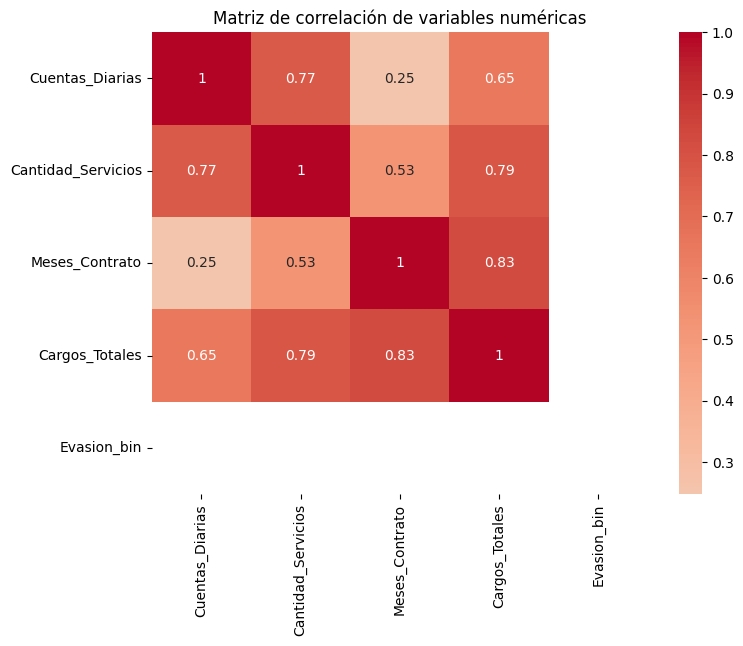

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de variables numéricas')
plt.show()


/tmp/ipython-input-54-501704426.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Cuentas_Diarias', data=telecom_df, palette=["green", "red"])


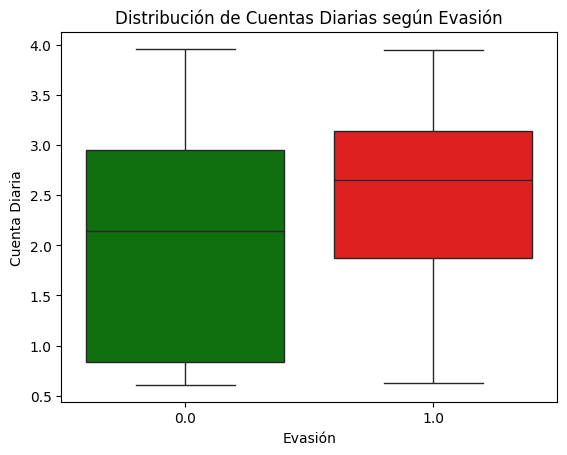

In [54]:
sns.boxplot(x='Evasion', y='Cuentas_Diarias', data=telecom_df, palette=["green", "red"])
plt.title('Distribución de Cuentas Diarias según Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cuenta Diaria')
plt.show()


/tmp/ipython-input-55-1415434084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Cantidad_Servicios', data=telecom_df, palette=["green", "red"])


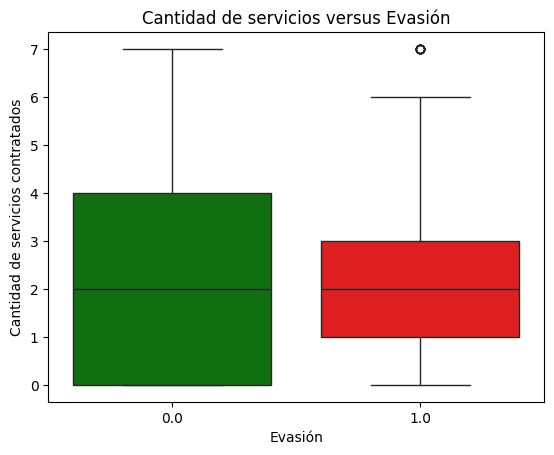

In [55]:
sns.boxplot(x='Evasion', y='Cantidad_Servicios', data=telecom_df, palette=["green", "red"])
plt.title('Cantidad de servicios versus Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de servicios contratados')
plt.show()


##**Informe de Análisis de Evasión de Clientes (Churn) en Telecomunicaciones**##

#**Introducción**

El presente análisis tiene como objetivo principal comprender el fenómeno de la evasión de clientes (churn) en una empresa de telecomunicaciones. El churn representa la cancelación voluntaria de contratos por parte de los clientes, un problema crítico para la sostenibilidad del negocio, ya que implica pérdida de ingresos y aumento de costos de adquisición de nuevos usuarios. Mediante el análisis de datos, se busca identificar factores asociados a la evasión y proponer estrategias efectivas de retención.


#**Limpieza y Tratamiento de Datos**


**Importación y estructuración**

*   Se importaron los datos en formato JSON directamente desde la fuente oficial.
*   Los datos se transformaron en un DataFrame de Pandas, permitiendo el manejo eficiente y flexible de la información.

**Limpieza**

*   Eliminación de columnas duplicadas: Se detectaron y eliminaron columnas con nombres repetidos, asegurando integridad y unicidad de la información.
*   Conversión de tipos de datos: Variables numéricas (como cargos y tiempo en meses) se tipificaron correctamente; las categóricas (como género, método de pago y otras) se transformaron a tipo category para eficiencia y claridad.
*   Tratamiento de valores nulos: Se identificaron y trataron los valores faltantes, especialmente en Charges.Total, minimizando su impacto sobre el análisis.
*   Estandarización y traducción: Se tradujeron columnas y se estandarizaron valores categóricos ("Yes"/"No" a 1/0; nombres de variables a español), facilitando la interpretación y el procesamiento posterior.


#**Análisis Exploratorio de Datos**


**Distribución y patrones de evasión**

*   Se observó que aproximadamente un 27% de los clientes ha cancelado el servicio, siendo la base de usuarios retenidos del 73%.
*   Gráficos de barras y circulares permitieron visualizar de forma clara la distribución relativa de clientes evadidos versus retenidos.

**Análisis por segmentos**

*   Por género: La evasión es similar entre hombres y mujeres, sin diferencias estadísticamente relevantes.
*   Por tipo de contrato: Los clientes con contratos mes a mes ("Month-to-month") presentan tasas de evasión notoriamente superiores, mientras los contratos anuales o bianuales retienen mejor a los clientes.
*   Por método de pago: Se detecta mayor churn entre quienes utilizan pagos electrónicos ("Electronic check"), respecto a quienes tienen pagos automáticos o tradicionales.
*   Variables numéricas: asociación con evasión
*   Cargos Totales y Tiempo de Contrato: Los clientes que cancelan suelen tener menos tiempo de permanencia y menor gasto acumulado, lo que sugiere baja vinculación o insatisfacción temprana.
*   Cuentas Diarias: Clientes con un gasto diario promedio bajo son más propensos a cancelar.

**Correlaciones y multivariable**

*   El número de servicios contratados muestra relación negativa con la evasión; mayor cantidad de servicios equivale a mayor retención.
*   Las correlaciones refuerzan el papel central de la antigüedad, el gasto total y el involucramiento en servicios extra como factores protectores frente al churn.



#**Conclusiones e Insights**



*   La empresa enfrenta una tasa importante de evasión, concentrada especialmente en clientes con menor antigüedad y bajo involucramiento en productos adicionales.
*   Los contratos mes a mes y los métodos de pago electrónicos representan un segmento de alto riesgo.
*   Las variables más asociadas al churn son: tiempo de contrato, cargos totales y cantidad de servicios activos.
*   Existen oportunidades de retención si se actúa sobre los clientes recientes y aquellos que usan pocos servicios.



#**Recomendaciones**



1.   Implementar estrategias de retención temprana, enfocadas en los primeros meses de relación contractual.
2.   Fomentar upgrades o cross-selling para aumentar la cantidad de servicios contratados por cliente.
3.  Incentivar contratos de mayor plazo y métodos de pago automáticos o tradicionales para reducir la volatilidad del churn.
4.  Monitorizar en tiempo real los indicadores de riesgo (bajo gasto diario, baja antigüedad, uso de servicios mínimos) para activar campañas personalizadas de fidelización.
5.  Invertir en la mejora de experiencia y soporte, particularmente dirigida a clientes en sus primeras etapas con la empresa.
6.  Profundizar en análisis predictivos utilizando los insights identificados para modelos de machine learning que anticipen y reduzcan el churn.

